In [44]:
import requests
import env
from requests.models import Request, Response
from env import Client_ID
import pandas as pd
from igdb.igdbapi_pb2 import GameResult
from typing import Dict, List, Optional, Union, cast
import acquire
import json
from igdb.wrapper import IGDBWrapper
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import os
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

In [17]:
game_ratings = pd.read_json('game_ratings.json')
game_ratings.head()

,id,category,created_at,slug,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
16,18248,0,2016-03-08 17:38:57,beat-city,0,False,False,False,False,0,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,fair
23,100789,0,2018-05-07 00:00:00,flying-arrow--1,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unimpressive
42,75935,0,2017-11-15 17:20:25,boinks,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
47,88912,9,2018-02-23 10:46:00,sonic-the-hedgehog-classic,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,good
51,35350,0,2017-05-26 21:04:42,vernons-legacy,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average


In [7]:
not_rated = pd.read_json('game_nonratings (1).json')
not_rated.head()

,id,category,created_at,slug,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,...,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,40104,0,2017-06-26 00:00:00,dogou-souken,0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,NaN
1,85031,0,2018-01-31 10:00:13,city-mysteries,0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,NaN
2,99234,0,2018-04-27 15:45:05,sword-of-the-black-stone,0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,NaN
3,148930,0,2021-05-25 16:18:34,bok-bok-a-chicken-dating-sim,0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,NaN
4,139538,0,2020-10-10 22:21:07,sun-machine,0,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
game_ratings.head()

### Connect to API and scrape the data needed
#### get the access token and 200 response 

In [3]:
# Connects to api and returns access token
access_token = acquire.connect_api()
# imports wrapper ogject with Client id and access token
wrapper = acquire.run_wrapper()


In [6]:
access_token

'59zjpn5sbbf1ljyr99dui5lnlsed5v'

In [4]:
# Connects to the api to return the games library
game_library = acquire.get_game_library(wrapper)
time.sleep(2.4)

HTTPError: 500 Server Error: Internal Server Error for url: https://api.igdb.com/v4/games

In [ ]:
# Connects to the api to return the games library
game_library = acquire.get_game_library(wrapper)
time.sleep(2.4)
# returns genres table
genres = acquire.get_genres(wrapper)
time.sleep(2.4)
age_ratings = acquire.get_age_ratings(wrapper)
time.sleep(2.4)
age_rating_desc = acquire.get_age_rating_desc(wrapper)
time.sleep(2.4)
characters = acquire.get_characters(wrapper)
time.sleep(2.4)
collections = acquire.get_collections(wrapper)
time.sleep(2.4)
franchises = acquire.get_franchises(wrapper)
time.sleep(2.4)
game_engines = acquire.get_game_engines(wrapper)
time.sleep(2.4)
game_modes = acquire.get_game_modes(wrapper)
time.sleep(2.4)
game_versions = acquire.get_game_version(wrapper)
time.sleep(2.4)
game_version_features = acquire.get_game_version_features(wrapper)
time.sleep(2.4)
game_version_feature_values = acquire.get_game_version_feature_values(wrapper)
time.sleep(2.4)
companies = acquire.get_companies(wrapper)
time.sleep(2.4)
involved_companies = acquire.get_involved_companies(wrapper)
time.sleep(2.4)
multi_player_modes = acquire.get_multi_player_modes(wrapper)
time.sleep(2.4)
platform_families = acquire.get_platform_families(wrapper)
time.sleep(2.4)
platform_version_release_dates = acquire.get_platform_version_release_dates(wrapper)
time.sleep(2.4)
platform_version_release_companies = acquire.get_platform_version_companies(wrapper)
time.sleep(2.4)
platforms = acquire.get_platforms(wrapper)
time.sleep(2.4)
release_dates = acquire.get_release_dates(wrapper)
time.sleep(2.4)
platform_versions = acquire.get_platform_versions(wrapper)
time.sleep(2.4)
player_perspectives = acquire.get_player_perspectives(wrapper)
time.sleep(2.4)
themes = acquire.get_themes(wrapper)

age_ratings_enums_category , age_ratings_enums_rating , age_ratings_descriptions_enums_ , character_enums_gender , character_enums_species , company_enums_change_date_categ ,  company_enums_start_date_catego , external_game_enums_category , external_game_enums_media , company_website_enums_category, game_enums_category, game_enums_status, game_version_feature_eums_categ, game_feature_value_enums_includ , platform_enums_category , platform_version_release_date_c , platform_version_release_date_r , release_date_category , release_date_region , platform_website_enums_category , website_enums_category = acquire.import_workbook()




In [ ]:
def get_api():   
    url = env.get_db_url()
    response = requests.post(url)
    data = response.json()
    access_token = data['access_token']
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *;'
    r = requests.post('https://api.igdb.com/v4/games', data=data, headers=headers)
    return access_token, r

In [ ]:
access_token = acquire.connect_api()

In [ ]:
tf = acquire.connect_to_games()

In [ ]:
tf

In [ ]:
wrapper = acquire.run_wrapper()

In [ ]:
game_library = acquire.get_game_library(wrapper)
game_library.head()

In [8]:
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## scraping endpoints
scrape the end points of each category and add them to the game_librarys

### platform_families

In [ ]:
def get_platform_families():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_families' ,data=data ,  headers=headers)
    platform_families = wrapper.api_request('platform_families', 'fields *;limit 500;')
    x = json.loads(platform_families)
    platform_families =pd.DataFrame(x)
    return platform_families

In [ ]:
platform_families = get_platform_families()
platform_families.head()

### platform_version_release_dates

In [ ]:
def get_platform_version_release():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_release_dates' ,data=data ,  headers=headers)
    platform_version_release_dates = wrapper.api_request('platform_version_release_dates', 'fields *;limit 500;')
    x = json.loads(platform_version_release_dates)
    platform_version_release_dates =pd.DataFrame(x)
    return platform_version_release_dates

In [ ]:
platform_version_release_dates = get_platform_version_release()
platform_version_release_dates

In [ ]:
# drop columns not needed
platform_version_release_dates = platform_version_release_dates.drop(columns=['category', 'date', 'm', 'y', 'region', 'updated_at', 'checksum', 'updated_at'])
platform_version_release_dates.head()


In [ ]:
df.head()

In [ ]:
version_dates_dict[9] = 'not_available'
version_dates_dict[384] = 'not_available'
version_dates_dict[386] = 'not_available'


In [ ]:
version_dates_list = platform_version_release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
version_dates_dict = platform_version_release_dates.set_index('game').to_dict()['human']

In [ ]:
def test_funct3(random_list):
    if type(random_list) == list:
        return [version_dates_dict[i] for i in random_list]
    else:  
        return "Not available"

In [ ]:
platforms.set_index('Locality', inplace=True)
data.set_index('Locality', inplace=True)


In [ ]:
df['release_dates'] = df.release_dates.apply(test_funct3)
df.head()

In [ ]:
all_release_dates = pd.merge(release_dates, platform_version_release_dates, how = 'inner', on="human")

### platform_version_companies

In [ ]:
def get_platform_version_companies():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_version_companies' ,data=data ,  headers=headers)
    platform_version_companies = wrapper.api_request('platform_version_companies', 'fields *;limit 500;')
    x = json.loads(platform_version_companies)
    platform_version_companies =pd.DataFrame(x)
    return platform_version_companies

In [ ]:
platform_version_companies=get_platform_version_companies()
platform_version_companies.head()

### platforms (use this)

In [ ]:
def get_platforms():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platforms' ,data=data ,  headers=headers)
    platforms = wrapper.api_request('platforms', 'fields *;limit 500;')
    x = json.loads(platforms)
    platforms =pd.DataFrame(x)
    return platforms

In [ ]:
platform = get_platforms()
platform.shape

In [ ]:
# see if there is a number in id that matches the big df
platform.loc[platform['id'] == 5]

In [ ]:
# looking at the dictionary
print(game_library.get(92, "Not found"))

In [ ]:
platformlist = platform[['id' , 'name']].sort_values(by='id').reset_index(drop=True)


In [ ]:
platform_dict = platformlist.set_index('id').to_dict()['name']

In [ ]:
platform_dict[92] = 'not_available'

In [ ]:
def test_funct(random_list):
    if type(random_list) == list:
        return [platform_dict[i] for i in random_list]
    else:  
        return  ["Not available"]

In [ ]:
game_library['platforms'] = game_library.platforms.apply(test_funct)
game_library.head()

### release_dates

In [ ]:
def get_release_dates():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/release_dates' ,data=data ,  headers=headers)
    release_dates = wrapper.api_request('release_dates', 'fields *;limit 500;')
    x = json.loads(release_dates)
    release_dates =pd.DataFrame(x)
    return release_dates

In [ ]:
release_dates = get_release_dates()
release_dates.shape

In [ ]:
release_dates = release_dates.drop(columns=['category', 'date', 'm', 'region', 'updated_at', 'y', 'checksum', 'created_at', 'platform'])
release_dates.head()

In [ ]:
release_dates

In [ ]:
# add to dictionary
release_dict[91007] = "not-available"
release_dict[138333] = "not-available"
release_dict[188385] = "not-available"
release_dict[213594] = "not-available"
release_dict[77755] = "not-available"


In [ ]:
releaselist = release_dates[['game' , 'human']].sort_values(by='game').reset_index(drop=True)
release_dict = releaselist.set_index('game').to_dict()['human']

In [ ]:
release_dates.head()

In [ ]:
def test_funct2(random_list):
    if type(random_list) == list:
        return [release_dict[i] for i in random_list]
    else:  
        return  ["Not available"]

In [ ]:
release_dict

In [ ]:
df.release_dates.head()

In [ ]:
df['release_dates'] = pd.DataFrame(df.release_dates.apply(test_funct2))
df

In [ ]:
release_dict

In [ ]:
# add 0 and description to dictionary
release_dict["0"] = "not-available"

### platform_versions

In [ ]:
def get_platform_versions():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/platform_versions' ,data=data ,  headers=headers)
    platform_versions = wrapper.api_request('platform_versions', 'fields *;limit 500;')
    x = json.loads(platform_versions)
    platform_versions=pd.DataFrame(x)
    return platform_versions

In [ ]:
platform_versions = get_platform_versions()
platform_versions.shape

In [ ]:
platform_versions.head()

In [ ]:
df.columns

### player_perspectives (use this)

In [ ]:
def get_player_perspectives():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/player_perspectives' ,data=data ,  headers=headers)
    player_perspectives = wrapper.api_request('player_perspectives', 'fields *;limit 500;')
    x = json.loads(player_perspectives)
    player_perspectives=pd.DataFrame(x)
    return player_perspectives

In [ ]:
player_perspectives = get_player_perspectives()
player_perspectives.shape

In [ ]:
player_perspectives = player_perspectives.drop(columns=['created_at','updated_at', 'url', 'checksum'])
player_perspectives.head()


In [ ]:
player_perspectives_list = player_perspectives[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
player_perspectives_dict = player_perspectives.set_index('id').to_dict()['name']

In [ ]:
def test_funct4(random_list):
    if type(random_list) == list:
        return [player_perspectives_dict[i] for i in random_list]
    else:  
        return  ["Not available"]

In [ ]:
game_library['player_perspectives'] = pd.DataFrame(game_library.player_perspectives.apply(test_funct4))
game_library.head()

### themes (use this)

In [ ]:
def get_themes():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; '
    r = requests.post('https://api.igdb.com/v4/themes' ,data=data ,  headers=headers)
    themes = wrapper.api_request('themes', 'fields *;limit 500;')
    x = json.loads(themes)
    themes=pd.DataFrame(x)
    return themes

In [ ]:
themes = get_themes()
themes.shape

In [ ]:
themes_list = themes[['id' , 'name']].sort_values(by='id').reset_index(drop=True)
themes_dict = themes.set_index('id').to_dict()['name']

In [ ]:
def test_funct5(random_list):
    if type(random_list) == list:
        return [themes_dict[i] for i in random_list]
    else:  
        return  ["Not available"]

In [ ]:
game_library['themes'] = pd.DataFrame(game_library.themes.apply(test_funct5))
game_library.head()

### Genres (use this)

In [ ]:
# function that puts response list object into a dataframe for each page
def get_genres(wrapper):
    genres = pd.DataFrame()
    for i in range (0, 409):
        genre = wrapper.api_request('genres', 'fields *; limit 500;')
        y = json.loads(genre)
        results_df =pd.DataFrame(y)
        genres = pd.concat([genres, results_df])
    return genres

In [ ]:
genres = get_genres(wrapper)
genres.head()

In [ ]:
genreslist = genres[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
genres_dict = genreslist.set_index('id').to_dict()['slug']

In [ ]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return  ["Not available"] 

In [ ]:
game_library['genres'] = pd.DataFrame(game_library.genres.apply(test_functg))
game_library.head()

## Game modes (use this)

In [ ]:
def get_game_modes():
    headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
    data = 'fields *; limit 500;'
    r = requests.post('https://api.igdb.com/v4/game_modes' ,data=data ,  headers=headers)
    game_modes = wrapper.api_request('game_modes', 'fields *;limit 500;')
    x = json.loads(game_modes)
    game_modes =pd.DataFrame(x)
    return game_modes

In [ ]:
game_mode = get_game_modes()

In [ ]:
modelist = game_mode[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
mode_dict = modelist.set_index('id').to_dict()['slug']

In [ ]:
def test_functm(random_list):
    if type(random_list) == list:
        return [mode_dict[i] for i in random_list]
    else:  
        return  ["Not available"]

In [ ]:
game_library['game_modes'] = pd.DataFrame(game_library.game_modes.apply(test_functm))
game_library.head()

## Game version features (use this)

In [ ]:
def get_game_version_features(wrapper):
    game_version_features = pd.DataFrame()
    for i in range (0, 409):
        a_ratings = wrapper.api_request('game_version_features', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(a_ratings)
        results_df =pd.DataFrame(y)
        game_version_features = pd.concat([game_version_features, results_df])
    return game_version_features

In [ ]:
game_version_features = get_game_version_features(wrapper)
game_version_features.head()

In [ ]:
game_vf_df = game_version_features[['id','description', 'title']]
game_vf_df.head()

In [ ]:
game_vf_df = game_vf_df.rename(columns={'description': 'version_description', 'title': 'title_version'})

## Collections (use this)

In [ ]:
def get_collections(wrapper):
    collections = pd.DataFrame()
    for i in range (0, 409):
        a_ratings = wrapper.api_request('collections', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(a_ratings)
        results_df =pd.DataFrame(y)
        collections = pd.concat([collections, results_df])
    return collections

In [ ]:
collections = get_collections(wrapper)
collections.head()

In [ ]:
collectionslist = collections[['id' , 'slug']].sort_values(by='id').reset_index(drop=True)
collections_dict = collectionslist.set_index('id').to_dict()['slug']
# add 0 and description to dictionary
collections_dict[513] = "not-available"
game_library['collection'] = game_library['collection'].replace(np.nan, 0)

In [ ]:
def convert_collection_col(number):
    if number > 0:
        return collections_dict[number]
    else:  
        return 'other'

In [ ]:
game_library['collection'] = game_library['collection'].replace(np.nan, 0)

In [ ]:
game_library['collection'] = game_library['collection'].astype('int64')
game_library['collection'] = pd.DataFrame(game_library.collection.apply(convert_collection_col))
game_library.head()

## Game version feature values (use this)

In [ ]:
def vf_values(wrapper):
    vf_values= pd.DataFrame()
    for i in range (0, 409):
        gvf_values = wrapper.api_request('game_version_feature_values', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(gvf_values)
        results_df =pd.DataFrame(y)
        vf_values = pd.concat([vf_values, results_df])
    return vf_values

In [ ]:
gamevfv_df = vf_values(wrapper)
gamevfv_df.head()

In [ ]:
gamevfv_df = gamevfv_df[['game','game_feature']]
gamevfv_df.head()

In [ ]:
gamevfv_df = gamevfv_df.rename(columns={"game_feature": "id"})

In [ ]:
gamevfv_df = gamevfv_df.set_index('id')
gamevfv_df.head()

### Merging game feature version and game feature version values (use this)

In [ ]:
results_df = pd.merge(gamevfv_df,  game_vf_df , how = 'left', on="id")
results_df.head()

In [ ]:
results_df = results_df.rename(columns={'id': 'second','game': 'id' })
results_df = results_df.set_index('id')
results_df.head()

In [ ]:
#merging the to the main dataframe
game_library = pd.merge(game_library, results_df, how = 'left', on="id")
game_library.head()

## Multi player mode (use this)

In [ ]:
headers = {'Client-ID': f'{Client_ID}', 'Authorization': f'Bearer {access_token}'}
data = 'fields *; limit 500;'
r = requests.post('https://api.igdb.com/v4/multiplayer_modes' ,data=data ,  headers=headers)
multiplayer_modes = wrapper.api_request('multiplayer_modes', 'fields *;limit 500;')
x = json.loads(multiplayer_modes)
multiplayer_modes =pd.DataFrame(x)

In [ ]:
def multi_play(wrapper):
    multi_play= pd.DataFrame()
    for i in range (0, 409):
        multi_values = wrapper.api_request('multiplayer_modes', 'fields *; limit 500;' f'offset {i * 500};')
        y = json.loads(multi_values)
        results_df =pd.DataFrame(y)
        multi_play = pd.concat([multi_play, results_df])
    return multi_play

In [ ]:
multi_df = multi_play(wrapper)

In [ ]:
def test_functg(random_list):
    if type(random_list) == list:
        return [genres_dict[i] for i in random_list]
    else:  
        return  ["Not available"] 

In [ ]:
multi_df = multi_df.rename(columns={'game': 'id', 'id': 'second_id'})

In [ ]:
multi_df = multi_df.set_index('id')

In [ ]:
#marging this together with the main df
game_library = pd.merge(game_library, multi_df, how = 'left', on="id")
game_library.head()

In [ ]:
game_library['campaigncoop'].fillna(False, inplace = True)
game_library['dropin'].fillna(False, inplace = True)
game_library['lancoop'].fillna(False, inplace = True)
game_library['offlinecoop'].fillna(False, inplace = True)
game_library['offlinemax'].fillna(0, inplace = True)
game_library['onlinecoop'].fillna(False, inplace = True)
game_library['splitscreen'].fillna(False, inplace = True)
game_library['offlinecoopmax'].fillna(0, inplace = True)
game_library['onlinecoopmax'].fillna(0, inplace = True)
game_library['onlinemax'].fillna(0, inplace = True)

### loop through genres list

In [ ]:
# list of genres to add
items = ['point-and-click', 'fighting', 'shooter', 'music', 'platform', 'puzzle', 'racing', 'real-time-strategy-rts', 'role-playing-rpg', 'simulator', 'sport', 'strategy', 'turn-based-strategy-tbs', 'tactical', 'hack-and-slash-beat-em-up', 'quiz-trivia', 'pinball', 'adventure', 'indie', 'arcade', 'visual-novel', 'card-and-board-game', 'moba']
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for item in items:
    game_library[item] = game_library['genres'].apply(my_list, word=item)

In [ ]:
game_library.head()

### Adding platforms to game_library

In [ ]:
len(platform_dict)

In [ ]:
# list of platformd to add
platforms = ['Linux', 'Nintendo 64', 'Wii', 'PC (Microsoft Windows)', 'PlayStation', 'PlayStation 2', 'PlayStation 3', 'Xbox', 'Xbox 360', 'DOS', 'Mac', 'Nintendo Entertainment System', 'Super Nintendo Entertainment System', 'Nintendo DS', 'Nintendo GameCube', 'Game Boy Color', 'Game Boy Advance', 'Sega Mega Drive/Genesis','Sega Saturn', 'Game Boy', 'Android', 'Nintendo 3DS','PlayStation Portable', 'iOS', 'Wii U', 'PlayStation Vita', 'Virtual Console (Nintendo)', 'PlayStation 4', 'Xbox One', 'Family Computer Disk System', 'Arcade', 'Windows Phone', 'Apple II', 'Web browser', 'Odyssey', 'Commodore 16', 'New Nintendo 3DS']
 

In [ ]:
# function to loop through column list and check for genre
def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0

In [ ]:
for platform in platforms:
    game_library[platform] = game_library['platforms'].apply(my_list, word=platform)

### Adding themes to game library 

In [ ]:
themes = ['Thriller', 'Science fiction', 'Action', 'Horror', 'Survival', 'Fantasy', 'Historical', 'Stealth', 'Comedy', 'Business', 'Drama', 'Non-fiction', 'Kids', 'Sandbox', 'Open world', 'Warfare', 'Educational', 'Mystery', 'Party', 'Romance', 'Erotic']

def my_list_themes(column, word):
    if word in column:
        return 1
    else:
        return 0


In [ ]:
for theme in themes:
    game_library[theme] = game_library['themes'].apply(my_list_themes, word=theme)

In [ ]:
game_library.head()

### Add player perspective 

In [ ]:
player_perspectives_dict

In [ ]:
players = ['First person', 'Third person', 'Bird view / Isometric', 'Text', 'Side view', 'Virtual Reality', 'Auditory'  'Drama']

def my_list_player(column, word):
    if word in column:
        return 1
    else:
        return 0


In [ ]:
for player in players:
    game_library[player] = game_library['player_perspectives'].apply(my_list_player, word=player)

In [ ]:
game_library.head()

In [ ]:
game_library.shape

### Add game modes

In [ ]:
modes = ['single-player', 'multiplayer', 'co-operative', 'split-screen', 'massively-multiplayer-online-mmo', 'battle-royale']

def my_list(column, word):
    if word in column:
        return 1
    else:
        return 0
    

In [ ]:
for mode in modes:
    game_library[mode] = game_library['player_perspectives'].apply(my_list, word=mode)

In [ ]:
game_library.head()

### turn dlc column into boolean column

In [ ]:
game_library['dlcs'] = game_library['dlcs'].fillna(0)
game_library.head()

In [ ]:
def dlcs_col(df):
    game_library['has_dlcs'] = np.where(game_library.dlcs != 0, 1, 0)  
    return df

In [ ]:
game_library = dlcs_col(game_library)
game_library.head()

#### Delete columns we dont need and add rating bin

In [ ]:
game_library['rating_bin'] = pd.cut(game_library.rating, 
                           bins = [0,10,20, 30, 40, 50, 60, 70, 80, 90, 100],
                           labels = ['awful','very_bad','bad','unimpressive','average','fair','alright','good','great', 'subperb'])

In [ ]:
game_library = game_library.drop(columns=['remasters', 'summary', 'age_ratings', 'involved_companies', 'status', 'aggregated_rating', 'total_rating', 'remakes', 'ports', 'parent_game', 'aggregated_rating', 'multiplayer_modes', 'expansions', 'expanded_games', 'forks', 'standalone_expansions', 'second', 'version_description', 'title_version'])
                                        
                                          

In [ ]:
train.head()

In [18]:
game_ratings = game_ratings.drop(columns=['slug', 'id', 'created_at', 'dlcs'])
game_ratings.head()

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
16,0,False,False,False,False,0,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,fair
23,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unimpressive
42,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
47,9,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,good
51,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average


In [19]:
def replace_booleans(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_booleans(game_ratings)

In [20]:
replace_booleans(game_ratings)

In [21]:
game_ratings.head()

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
16,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,fair
23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,unimpressive
42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
47,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,good
51,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average


### Prep not rated df

In [9]:
not_rated['dlcs'] = not_rated['dlcs'].fillna(0)
not_rated.head()

,id,category,created_at,slug,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,40104,0,2017-06-26 00:00:00,dogou-souken,0,False,False,False,False,0,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,85031,0,2018-01-31 10:00:13,city-mysteries,0,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,99234,0,2018-04-27 15:45:05,sword-of-the-black-stone,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,148930,0,2021-05-25 16:18:34,bok-bok-a-chicken-dating-sim,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,139538,0,2020-10-10 22:21:07,sun-machine,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


In [10]:
def dlcs_col(df):
    not_rated['has_dlcs'] = np.where(not_rated.dlcs != 0, 1, 0)  
    return df

In [11]:
not_rated = dlcs_col(not_rated)
not_rated.head()

,id,category,created_at,slug,dlcs,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,40104,0,2017-06-26 00:00:00,dogou-souken,0,False,False,False,False,0,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,85031,0,2018-01-31 10:00:13,city-mysteries,0,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,99234,0,2018-04-27 15:45:05,sword-of-the-black-stone,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,148930,0,2021-05-25 16:18:34,bok-bok-a-chicken-dating-sim,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,139538,0,2020-10-10 22:21:07,sun-machine,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


In [12]:
not_rated = not_rated.drop(columns=['slug', 'id', 'created_at', 'dlcs'])
not_rated.head()

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,0,False,False,False,False,0,False,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,False,False,False,False,0,False,False,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,0,False,False,False,False,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


In [13]:
def replace_booleans(data):
    for col in data:
        data[col].replace(True, 1, inplace=True)
        data[col].replace(False, 0, inplace=True)

replace_booleans(not_rated)

In [14]:
replace_booleans(not_rated)

In [15]:
not_rated.head()

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


### Dataframe with ratings

In [ ]:
game_library.head()

In [ ]:
game_ratings = game_library[game_library['rating_bin'].notnull()]
game_ratings.shape

In [ ]:
game_ratings.head()

In [ ]:
game_ratings_df = game_ratings.to_json(orient='index')
print(game_ratings)

### Dataframe with nulls in rating column 

In [ ]:
not_rated = game_library[game_library['rating_bin'].isnull()]
not_rated.shape

### Splitting the dataframe

In [22]:
def split(game_ratings, stratify_by='rating_bin'):
    # split df into train_validate 
    train_validate, test = train_test_split(game_ratings, test_size=.20, random_state=13)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=13)

    X_train = train.drop(columns=['rating_bin'])
    y_train = train[['rating_bin']]

    X_validate = validate.drop(columns=['rating_bin'])
    y_validate = validate[['rating_bin']]

    X_test = test.drop(columns=['rating_bin'])
    y_test = test[['rating_bin']]

    return train, X_train, X_validate, X_test, y_train, y_validate, y_test

In [ ]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [ ]:
mask = train.dlcs.apply(lambda x: isinstance(x, list))
train[mask].head()

In [23]:
train, X_train, X_validate, X_test, y_train, y_validate, y_test = split(game_ratings, stratify_by='rating') #split data
train.head()

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_bin
157554,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,good
177892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fair
187675,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,fair
70314,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,alright
125626,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,average


In [ ]:
X_train.shape

### Feature selection

In [ ]:
def feature_chi2(X_train, X_validate, X_test, y_train, k = 21):
     
    # Feature selection
    fs = SelectKBest(score_func = chi2, k = k)
    fs.fit(X_train, y_train)
    
    # Selected columns
    cols = fs.get_support(indices = True)
    
    # Output data
    X_train_fs = X_train.iloc[:, cols]
    X_validate_fs = X_validate.iloc[:, cols]
    X_test_fs = X_test.iloc[:, cols]
    
    return X_train_fs, X_validate_fs, X_test_fs

In [ ]:
X_train_fs, X_validate_fs, X_test_fs = feature_chi2(X_train, X_validate, X_test, y_train, k = 21) # fitting the df to the function 
X_train_fs.head()


In [ ]:
X_train_fs.shape

In [26]:
predictions = pd.DataFrame({ #for train
    'actual': train.rating_bin
})
predictions['baseline'] = train[train['rating_bin'] == 'alright'].shape[0] /train.shape[0]

pred_Valid = pd.DataFrame({ #for validate 
    'actual': y_validate.rating_bin
})
pred_Valid['baseline'] = train[train['rating_bin'] == 'alright'].shape[0] /train.shape[0]
pred_Valid.head()

# df to hold predictions 
pred_Test = pd.DataFrame({ # for test
    'actual': y_test.rating_bin
})
pred_Test['baseline'] = train[train['rating_bin'] == 'alright'].shape[0] /train.shape[0]

In [ ]:
predictions.head()

### random forest 
Max depth of 15

In [ ]:
# assign model to train
rf = RandomForestClassifier(max_depth=21, random_state=123)
#fit model
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [ ]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

In [ ]:
predictions['RF'] = rf.score(X_train, y_train)

On validate

In [ ]:
y_pred = rf.predict(X_validate)
y_pred_proba = rf.predict_proba(X_validate)
predictions['RF_val'] = rf.score(X_validate, y_validate)

In [ ]:
predictions.head()

### Random Forest 
loop through range from 1 to 30

In [ ]:
# Compare in-sample to out-of-sample

metrics = []

for i in range(1,30):
    rf = RandomForestClassifier(max_depth=(i), 
                                random_state=123)
    
    rf = rf.fit(X_train_fs, y_train)
    
    in_sample_accuracy = rf.score(X_train_fs, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate_fs, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics.append(output)
    
RF_prediction = pd.DataFrame(metrics)
RF_prediction["difference"] = RF_prediction.train_accuracy - RF_prediction.validate_accuracy
RF_prediction

## running model on with all the features 

In [ ]:
RFX_prediction.head()

In [ ]:
DT_prediction_X.head()

In [ ]:
plt.plot(RFX_prediction.train_accuracy)
plt.plot(RFX_prediction.validate_accuracy)
plt.plot(DT_prediction_X.train_accuracy)
plt.plot(DT_prediction_X.validate_accuracy)
plt.plot(DT_prediction_X.train_accuracy)
plt.plot(DT_prediction_X.validate_accuracy)

plt.show()

In [24]:
metrics_X = []

for i in range(1,30):
    rf = RandomForestClassifier(max_depth=(i), 
                                random_state=123)
    
    rf = rf.fit(X_train, y_train)
    
    in_sample_accuracy = rf.score(X_train, y_train)
    
    out_of_sample_accuracy = rf.score(X_validate, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics_X.append(output)
    
RFX_prediction = pd.DataFrame(metrics_X)
RFX_prediction["difference"] = RFX_prediction.train_accuracy - RFX_prediction.validate_accuracy
RFX_prediction

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.310935,0.306070,0.004864
1,2,0.330281,0.323475,0.006805
2,3,0.335618,0.329560,0.006058
3,4,0.345018,0.332814,0.012203
4,5,0.354297,0.341871,0.012426
5,6,0.372612,0.354747,0.017865
6,7,0.387834,0.359276,0.028559
7,8,0.401965,0.362672,0.039293
8,9,0.417490,0.366634,0.050857
9,10,0.437201,0.371586,0.065614


### Decision tree loop

In [ ]:
metric = []

for i in range(1,30):
    tree1 = DecisionTreeClassifier(max_depth=(i), random_state=123)

    
    tree1 = tree1.fit(X_train_fs, y_train)
    
    in_sample_accuracy = tree1.score(X_train_fs, y_train)
    
    out_of_sample_accuracy = tree1.score(X_validate_fs, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metric.append(output)
    
DT_prediction = pd.DataFrame(metric)
DT_prediction["difference"] = DT_prediction.train_accuracy - DT_prediction.validate_accuracy
DT_prediction

#### DT without feature selection

In [49]:
metric_dt = []

for i in range(1,5):
    tree1 = DecisionTreeClassifier(max_depth=(i), random_state=123)

    
    tree1 = tree1.fit(X_train, y_train)
    
    in_sample_accuracy = tree1.score(X_train, y_train)
    
    out_of_sample_accuracy = tree1.score(X_validate, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metric_dt.append(output)
    
DT_prediction_X = pd.DataFrame(metric_dt)
DT_prediction_X["difference"] = DT_prediction_X.train_accuracy - DT_prediction_X.validate_accuracy
DT_prediction_X

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.327067,0.321070,0.005997
1,2,0.327552,0.317674,0.009878
2,3,0.338044,0.331258,0.006786
3,4,0.347201,0.336352,0.010849


[Text(0.5, 0.9, 'X[26] <= 0.5\ngini = 0.806\nsamples = 16489\nvalue = [4608, 2493, 215, 2029, 3979, 2192, 237, 633, 103]'),
 Text(0.25, 0.7, 'X[0] <= 1.5\ngini = 0.803\nsamples = 9184\nvalue = [1911, 995, 129, 963, 2696, 1897, 194, 309, 90]'),
 Text(0.125, 0.5, 'X[54] <= 0.5\ngini = 0.807\nsamples = 8086\nvalue = [1762, 955, 128, 901, 2314, 1507, 126, 305, 88]'),
 Text(0.0625, 0.3, 'X[90] <= 0.5\ngini = 0.81\nsamples = 7034\nvalue = [1604, 874, 122, 833, 2007, 1115, 120, 280, 79]'),
 Text(0.03125, 0.1, 'gini = 0.818\nsamples = 4952\nvalue = [1159, 741, 99, 611, 1276, 697, 66, 234, 69]'),
 Text(0.09375, 0.1, 'gini = 0.774\nsamples = 2082\nvalue = [445, 133, 23, 222, 731, 418, 54, 46, 10]'),
 Text(0.1875, 0.3, 'X[34] <= 0.5\ngini = 0.743\nsamples = 1052\nvalue = [158, 81, 6, 68, 307, 392, 6, 25, 9]'),
 Text(0.15625, 0.1, 'gini = 0.701\nsamples = 730\nvalue = [99, 39, 4, 44, 183, 335, 2, 15, 9]'),
 Text(0.21875, 0.1, 'gini = 0.763\nsamples = 322\nvalue = [59, 42, 2, 24, 124, 57, 4, 10, 0]

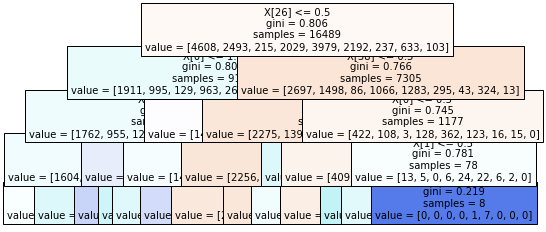

In [63]:
from sklearn import tree
tree.plot_tree(tree1, filled=True, fontsize=10)

### KNN

In [ ]:
metric = []

for i in range(1,20):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=(i), weights='uniform')


    
    knn = knn.fit(X_train_fs, y_train)
    
    in_sample_accuracy = knn.score(X_train_fs, y_train)
    
    out_of_sample_accuracy = knn.score(X_validate_fs, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metric.append(output)
    
KNN_prediction = pd.DataFrame(metric)
KNN_prediction["difference"] = KNN_prediction.train_accuracy - KNN_prediction.validate_accuracy
KNN_prediction

#### KNN without feature selection

In [ ]:
metric_knn = []

for i in range(1,20):
    # weights = ['uniform', 'density']
    knn = KNeighborsClassifier(n_neighbors=(i), weights='uniform')


    
    knn = knn.fit(X_train, y_train)
    
    in_sample_accuracy = knn.score(X_train, y_train)
    
    out_of_sample_accuracy = knn.score(X_validate, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metric_knn.append(output)
    
KNN_prediction2 = pd.DataFrame(metric_knn)
KNN_prediction2["difference"] = KNN_prediction2.train_accuracy - KNN_prediction2.validate_accuracy
KNN_prediction2

### Logistic Regression

In [ ]:
metrics_lr = []

for i in range(1,15):
    # weights = ['uniform', 'density']
    logit = LogisticRegression(random_state=123)


    
    #fit model
    logit = logit.fit(X_train_fs, y_train)
    
    in_sample_accuracy = logit.score(X_train_fs, y_train)
    
    out_of_sample_accuracy = logit.score(X_validate_fs, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics_lr.append(output)
    
LR_prediction = pd.DataFrame(metrics_lr)
LR_prediction["difference"] = LR_prediction.train_accuracy - LR_prediction.validate_accuracy
LR_prediction

#### Without feature selection

In [60]:
metrics_lr2 = []

for i in range(1,15):
    # weights = ['uniform', 'density']
    logit = LogisticRegression(random_state=123)


    
    #fit model
    logit = logit.fit(X_train, y_train)
    
    in_sample_accuracy = logit.score(X_train, y_train)
    
    out_of_sample_accuracy = logit.score(X_validate, y_validate)
    
    output = {"max_depth": (i),
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy}
        
    metrics_lr2.append(output)
    
LR_prediction2 = pd.DataFrame(metrics_lr2)
LR_prediction2["difference"] = LR_prediction2.train_accuracy - LR_prediction2.validate_accuracy
LR_prediction2

,max_depth,train_accuracy,validate_accuracy,difference
0,1,0.348657,0.340456,0.008201
1,2,0.348657,0.340456,0.008201
2,3,0.348657,0.340456,0.008201
3,4,0.348657,0.340456,0.008201
4,5,0.348657,0.340456,0.008201
5,6,0.348657,0.340456,0.008201
6,7,0.348657,0.340456,0.008201
7,8,0.348657,0.340456,0.008201
8,9,0.348657,0.340456,0.008201
9,10,0.348657,0.340456,0.008201


In [62]:
import scikitplot as skplt
#logit = LogisticRegression(random_state=123)
Y_test_probs = logit.predict_proba(X_train)

skplt.metrics.plot_roc_curve(Y_train, Y_train,
                       title="Digits ROC Curve", figsize=(12,6));

ModuleNotFoundError: No module named 'scikitplot'

### one vs. rest classifier

on train

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X_train_fs, y_train)

ovr.n_classes_
#number of classes
#3

ovr.estimators_

ovr.predict(X_train_fs) 

ovr.score(X_train_fs, y_train)

on validate

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X_train_fs, y_train)

ovr.n_classes_
#number of classes
#3

ovr.estimators_

ovr.predict(X_validate_fs) 

ovr.score(X_validate_fs, y_validate)

#### without feature selection

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X_train, y_train)

ovr.n_classes_
#number of classes
#3

ovr.estimators_

ovr.predict(X_train) 

ovr.score(X_train, y_train)

In [ ]:
ovr = OneVsRestClassifier(LinearSVC(random_state=0, multi_class='ovr')).fit(X_train, y_train)

ovr.n_classes_
#number of classes
#3

ovr.estimators_

ovr.predict(X_validate) 

ovr.score(X_validate, y_validate)

### naive bayes classifier

In [ ]:
gnb = GaussianNB()
# fit the model
gnb.fit(X_train_fs, y_train)
# make predictions 
y_pred = gnb.predict(X_train_fs)

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred)*100)

#### Without feature selection

In [ ]:
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
# make predictions 
y_pred = gnb.predict(X_train)

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_train, y_pred)*100)

In [ ]:
gnb = GaussianNB()
# fit the model
gnb.fit(X_validate, y_validate)
# make predictions 
y_pred = gnb.predict(X_validate)

from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_validate, y_pred)*100)

### Random forest max depth of 21 on the test set

In [27]:
# assign model to train
rf = RandomForestClassifier(max_depth=21, random_state=123)
#fit model
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

pred_Test['RF'] = rf.score(X_test, y_test)
pred_Test

,actual,baseline,RF
78579,alright,0.279459,0.388625
120854,good,0.279459,0.388625
199274,good,0.279459,0.388625
149828,average,0.279459,0.388625
62728,great,0.279459,0.388625
...,...,...,...
204488,great,0.279459,0.388625
176738,good,0.279459,0.388625
123331,average,0.279459,0.388625
96043,fair,0.279459,0.388625


In [28]:
pred_Test["difference"] = pred_Test.RF - pred_Test.baseline
pred_Test.head()

,actual,baseline,RF,difference
78579,alright,0.279459,0.388625,0.109166
120854,good,0.279459,0.388625,0.109166
199274,good,0.279459,0.388625,0.109166
149828,average,0.279459,0.388625,0.109166
62728,great,0.279459,0.388625,0.109166


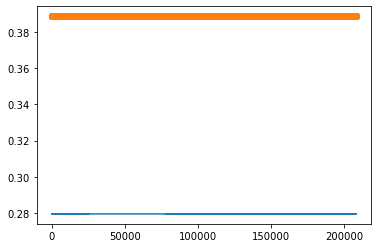

In [51]:
plt.plot(pred_Test.baseline)
plt.plot(pred_Test.RF, 'o')

plt.show()

In [ ]:
def plotGraph(y_test,y_pred,modelname):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue')
    plt.scatter(range(len(y_pred)), y_pred, color='red')
    plt.title(modelname)
    plt.show()
    return


y_test = range(10)
y_pred = np.random.randint(0, 10, 10)

plotGraph(y_test, y_pred, "test")

In [ ]:
game_ratings.head()

In [ ]:
pred_Test.to_csv('pred_Test.csv')

In [ ]:
RFX_prediction.to_csv('RFX_prediction.csv')

In [ ]:
DT_prediction_X.to_csv('DT_prediction_X.csv')

In [ ]:
KNN_prediction2.to_csv('KNN_prediction2.csv')

In [ ]:
LR_prediction2.to_csv('LR_prediction2.csv')

### Predictions on games without ratings

In [30]:
not_rated.shape

(178904, 104)

In [31]:
not_rated = not_rated.drop(columns=['rating_bin'])
not_rated.shape

(178904, 103)

In [35]:
rf = RandomForestClassifier(max_depth=21, random_state=123).fit(X_train, y_train)
y_pred = rf.predict(not_rated)

not_rated['rating_predictions'] = rf.predict(not_rated)
not_rated

,category,campaigncoop,dropin,lancoop,offlinecoop,offlinemax,onlinecoop,splitscreen,onlinemax,point-and-click,fighting,shooter,music,puzzle,racing,real-time-strategy-rts,role-playing-rpg,simulator,sport,strategy,turn-based-strategy-tbs,tactical,hack-and-slash-beat-em-up,quiz-trivia,pinball,adventure,indie,arcade,visual-novel,card-and-board-game,moba,Linux,Nintendo 64,Wii,PC (Microsoft Windows),PlayStation,PlayStation 2,PlayStation 3,Xbox,Xbox 360,DOS,Mac,Nintendo Entertainment System,Super Nintendo Entertainment System,Nintendo DS,Nintendo GameCube,Game Boy Color,Game Boy Advance,Sega Mega Drive/Genesis,Sega Saturn,Game Boy,Android,Nintendo 3DS,PlayStation Portable,iOS,Wii U,PlayStation Vita,Virtual Console (Nintendo),PlayStation 4,Xbox One,Family Computer Disk System,Arcade,Windows Phone,Apple II,Web browser,Odyssey,Commodore 16,New Nintendo 3DS,Thriller,Science fiction,Action,Horror,Survival,Fantasy,Historical,Stealth,Comedy,Business,Drama,Non-fiction,Kids,Sandbox,Open world,Warfare,Educational,Mystery,Party,Romance,Erotic,First person,Third person,Bird view / Isometric,Text,Side view,Virtual Reality,AuditoryDrama,single-player,multiplayer,co-operative,split-screen,massively-multiplayer-online-mmo,battle-royale,has_dlcs,rating_predictions
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,good
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,good
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,alright
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,alright
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208340,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average
208342,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,great
208347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average
208348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,average


In [36]:
not_rated.to_json('not_rated.json')

In [38]:

pred_Test.to_csv('pred_Test.csv')